In [15]:
import numpy as np
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler

In [16]:
hot_songs_with_features=pd.read_csv("../../../Day_2/Afternoon/lab-spotify-api/hot_songs_audio_features.csv")

In [17]:
display(hot_songs_with_features.head())

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,jack harlow,lovin on me,4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,audio_features,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4
1,taylor swift,cruel summer,6ClYMObS7f3Nn4AiZHYQt3,0.278,0.907,9,-4.606,1,0.0827,0.1260,0.000000,0.8900,0.330,83.178,audio_features,spotify:track:6ClYMObS7f3Nn4AiZHYQt3,https://api.spotify.com/v1/tracks/6ClYMObS7f3N...,https://api.spotify.com/v1/audio-analysis/6ClY...,229567,4
2,tate mcrae,greedy,3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,audio_features,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1
3,doja cat,paint the town red,2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.2690,0.000003,0.0901,0.732,99.968,audio_features,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4
4,zach bryan featuring kacey musgraves,i remember everything,4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.5540,0.000002,0.1020,0.155,77.639,audio_features,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4


In [18]:
not_hot_with_features=pd.read_csv('../../../Day_2/Afternoon/lab-spotify-api/not_hot_songs_audio_features.csv')

In [19]:
not_hot_with_features.head()

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,glenn miller,the little man who wasn't there,3ZDS2we70XCOEndkITg8Ft,0.734,0.422,10,-10.772,1,0.1750,0.868000,0.037100,0.1140,0.5770,88.387,audio_features,spotify:track:3ZDS2we70XCOEndkITg8Ft,https://api.spotify.com/v1/tracks/3ZDS2we70XCO...,https://api.spotify.com/v1/audio-analysis/3ZDS...,182827,4
1,misfits,american psycho,77v5yDwMLiJlIsHNJQxXrY,0.484,0.995,7,-5.300,1,0.1020,0.000248,0.001130,0.3810,0.0771,109.556,audio_features,spotify:track:77v5yDwMLiJlIsHNJQxXrY,https://api.spotify.com/v1/tracks/77v5yDwMLiJl...,https://api.spotify.com/v1/audio-analysis/77v5...,126907,4
2,elliott smith,somebody that i used to know,4xfAVJL8R7mVYbDk8a9xOY,0.576,0.367,1,-14.785,1,0.0300,0.432000,0.000002,0.1240,0.7700,108.446,audio_features,spotify:track:4xfAVJL8R7mVYbDk8a9xOY,https://api.spotify.com/v1/tracks/4xfAVJL8R7mV...,https://api.spotify.com/v1/audio-analysis/4xfA...,129333,4
3,june carter cash,juke box blues,00qOE7OjRl0BpYiCiweZB2,0.357,0.653,9,-5.554,1,0.0654,0.082800,0.000000,0.0844,0.5220,176.647,audio_features,spotify:track:00qOE7OjRl0BpYiCiweZB2,https://api.spotify.com/v1/tracks/00qOE7OjRl0B...,https://api.spotify.com/v1/audio-analysis/00qO...,259800,4
4,"emerson, lake & palmer","karn evil 9 1st impression, pt. 1",6WfjV745TiUcD8KdUKp241,0.384,0.817,1,-9.079,1,0.0661,0.267000,0.001910,0.0756,0.6850,128.490,audio_features,spotify:track:6WfjV745TiUcD8KdUKp241,https://api.spotify.com/v1/tracks/6WfjV745TiUc...,https://api.spotify.com/v1/audio-analysis/6Wfj...,285760,4


In [20]:
# We add a new column to each df with the corresponding flag:
hot_songs_with_features['tag'] = 'hot'
not_hot_with_features['tag'] = 'not_hot'

# Concatenate the DataFrames
all_songs_with_features = pd.concat([hot_songs_with_features, not_hot_with_features], ignore_index=True)

In [21]:
display(all_songs_with_features.head())

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,tag
0,jack harlow,lovin on me,4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.0026,...,0.0937,0.606,104.983,audio_features,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,hot
1,taylor swift,cruel summer,6ClYMObS7f3Nn4AiZHYQt3,0.278,0.907,9,-4.606,1,0.0827,0.1260,...,0.8900,0.330,83.178,audio_features,spotify:track:6ClYMObS7f3Nn4AiZHYQt3,https://api.spotify.com/v1/tracks/6ClYMObS7f3N...,https://api.spotify.com/v1/audio-analysis/6ClY...,229567,4,hot
2,tate mcrae,greedy,3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.2560,...,0.1140,0.844,111.018,audio_features,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,hot
3,doja cat,paint the town red,2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.2690,...,0.0901,0.732,99.968,audio_features,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,hot
4,zach bryan featuring kacey musgraves,i remember everything,4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.5540,...,0.1020,0.155,77.639,audio_features,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,hot


In [22]:
display(all_songs_with_features.tail())

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,tag
3083,aretha franklin,if ever i would leave you,6WISirSAs79wNXlex2bR1r,0.251,0.202,7,-11.526,1,0.0322,0.884000,...,0.390,0.2250,90.301,audio_features,spotify:track:6WISirSAs79wNXlex2bR1r,https://api.spotify.com/v1/tracks/6WISirSAs79w...,https://api.spotify.com/v1/audio-analysis/6WIS...,245960,3,not_hot
3084,the cowsills,the rain the park and other things,5Ozv6hQIj20iX3nFfJCe8E,0.376,0.662,11,-8.771,1,0.0404,0.809000,...,0.683,0.6910,131.582,audio_features,spotify:track:5Ozv6hQIj20iX3nFfJCe8E,https://api.spotify.com/v1/tracks/5Ozv6hQIj20i...,https://api.spotify.com/v1/audio-analysis/5Ozv...,184240,4,not_hot
3085,loverboy,gangs in the street,3XCpEFU4uXsBq5WmVQQKC9,0.652,0.152,7,-18.704,0,0.0836,0.808000,...,0.117,0.0742,130.470,audio_features,spotify:track:3XCpEFU4uXsBq5WmVQQKC9,https://api.spotify.com/v1/tracks/3XCpEFU4uXsB...,https://api.spotify.com/v1/audio-analysis/3XCp...,73236,4,not_hot
3086,guns n' roses,reckless life,7I2Q7AQqVInZYwOoDHZGOf,0.442,0.888,10,-8.820,0,0.0663,0.000054,...,0.933,0.4620,108.024,audio_features,spotify:track:7I2Q7AQqVInZYwOoDHZGOf,https://api.spotify.com/v1/tracks/7I2Q7AQqVInZ...,https://api.spotify.com/v1/audio-analysis/7I2Q...,200600,4,not_hot
3087,greta van fleet,brave new world,0HwdiT4MVRzY0OALcjq0Oh,0.341,0.848,7,-4.475,1,0.0371,0.058300,...,0.136,0.5890,136.568,audio_features,spotify:track:0HwdiT4MVRzY0OALcjq0Oh,https://api.spotify.com/v1/tracks/0HwdiT4MVRzY...,https://api.spotify.com/v1/audio-analysis/0Hwd...,300880,4,not_hot


In [23]:
display(all_songs_with_features.shape)

(3088, 21)

In [24]:
# Isolating the numerical columns to be able to scale the data and perform the dimensionality reduction
X = all_songs_with_features.select_dtypes(np.number)
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.943,0.558,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,138411,4
1,0.278,0.907,9,-4.606,1,0.0827,0.1260,0.000000,0.8900,0.330,83.178,229567,4
2,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,131872,1
3,0.868,0.538,5,-8.603,1,0.1740,0.2690,0.000003,0.0901,0.732,99.968,231750,4
4,0.429,0.453,0,-7.746,1,0.0459,0.5540,0.000002,0.1020,0.155,77.639,227196,4


In [25]:
# Checking the characteristics and range of vaues for the numerical columns
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,0.566113,0.585766,5.383744,-9.208756,0.703692,0.070355,0.325416,0.088209,0.183683,0.546204,120.504859,223854.114637,3.908031
std,0.160704,0.236148,3.536577,4.499259,0.456703,0.074618,0.317830,0.230192,0.151711,0.247696,29.915168,76438.953085,0.370556
min,0.108000,0.001310,0.000000,-46.911000,0.000000,0.022600,0.000001,0.000000,0.019200,0.034500,37.623000,34952.000000,1.000000
25%,0.459000,0.408000,2.000000,-11.671000,0.000000,0.033075,0.035450,0.000000,0.093600,0.343750,96.980250,173459.000000,4.000000
50%,0.570000,0.605000,5.000000,-8.435500,1.000000,0.042600,0.210500,0.000056,0.124000,0.560000,118.661000,212846.500000,4.000000
75%,0.678000,0.777000,9.000000,-5.939500,1.000000,0.068350,0.595250,0.007392,0.228250,0.744000,140.075250,256570.000000,4.000000
max,0.975000,0.999000,11.000000,2.362000,1.000000,0.864000,0.996000,0.985000,0.987000,0.985000,209.034000,834547.000000,5.000000


In [26]:
# We need to scale the columns as they have different ranges of values
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "song_scaler.pickle" 

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

In [27]:
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2.345602,-0.117597,-0.956940,0.955369,0.648904,-0.181694,-1.015852,-0.383250,-0.593221,0.241449,-0.518947,-1.117976,0.248232
1,-1.793106,1.360529,1.022696,1.023169,0.648904,0.165465,-0.627531,-0.383259,4.656434,-0.873000,-1.247959,0.074750,0.248232
2,1.144443,0.623584,0.174280,1.340161,-1.541059,-0.515448,-0.218442,-0.383259,-0.459392,1.202459,-0.317177,-1.203536,-7.849027
3,1.878830,-0.202304,-0.108525,0.134657,0.648904,1.389233,-0.177533,-0.383245,-0.616954,0.750219,-0.686614,0.103313,0.248232
4,-0.853340,-0.562306,-1.522550,0.325163,0.648904,-0.327795,0.719317,-0.383250,-0.538503,-1.579626,-1.433146,0.043727,0.248232


In [28]:
# Checking new range of values for the scaled df
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03,3.088000e+03
mean,-8.053431e-17,-1.702725e-16,-9.203921e-17,-4.601961e-18,1.127480e-16,6.442745e-17,1.380588e-17,-6.902941e-17,9.664118e-17,2.393020e-16,-3.543510e-16,1.150490e-17,-2.835958e-16
std,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00,1.000162e+00
min,-2.851122e+00,-2.475358e+00,-1.522550e+00,-8.381014e+00,-1.541059e+00,-6.401039e-01,-1.024029e+00,-3.832590e-01,-1.084366e+00,-2.066188e+00,-2.771012e+00,-2.471681e+00,-7.849027e+00
25%,-6.666309e-01,-7.528955e-01,-9.569400e-01,-5.473440e-01,-1.541059e+00,-4.996990e-01,-9.124780e-01,-3.832590e-01,-5.938800e-01,-8.174799e-01,-7.865047e-01,-6.593926e-01,2.482320e-01
50%,2.419110e-02,8.146262e-02,-1.085246e-01,1.718909e-01,6.489043e-01,-3.720277e-01,-3.616233e-01,-3.830142e-01,-3.934662e-01,5.570716e-02,-6.164623e-02,-1.440286e-01,2.482320e-01
75%,6.963422e-01,8.099377e-01,1.022696e+00,7.267388e-01,6.489043e-01,-2.687967e-02,8.491241e-01,-3.511393e-01,2.938080e-01,7.986732e-01,6.543022e-01,4.280695e-01,2.482320e-01
max,2.544758e+00,1.750179e+00,1.588306e+00,2.572119e+00,6.489043e-01,1.063786e+01,2.110221e+00,3.896477e+00,5.295912e+00,1.771797e+00,2.959819e+00,7.990583e+00,2.947318e+00


# PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_scaled_df)
principal_components = pca.transform(X_scaled_df)
principal_components_df = pd.DataFrame(principal_components, columns=['PCA_'+ str(i) for i in range(1,X_scaled_df.shape[1]+1)])
principal_components_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13
0,-1.113203,-2.083915,-0.541461,-1.018635,-0.051674,0.441171,0.722977,-0.115911,0.158022,-0.724603,1.583536,0.253393,-0.447331
1,-1.469976,2.341860,-0.573217,0.950809,3.356693,1.465644,-3.048854,-0.489567,0.137104,-0.560742,-0.227648,-0.012578,0.060426
2,-0.303142,0.003790,-0.857753,3.232825,-2.848313,3.111856,2.738523,-5.186328,1.546915,-2.272467,-0.048123,-0.375101,0.022714
3,-0.677660,-2.029257,0.518080,-0.418865,0.180384,0.688325,0.662776,0.415398,1.022325,0.581804,0.259893,-0.140933,-0.085448
4,1.346192,0.580890,-0.806682,-1.527453,0.556995,1.218343,0.528553,1.056176,-0.523560,-0.838996,-0.056230,-0.491571,-0.133817


In [30]:
# We print the variance to see which % of the data we can explain with each PCA
print(pca.explained_variance_ratio_)

[0.21263183 0.12730755 0.09689528 0.08343938 0.07856336 0.07498905
 0.06991109 0.06542681 0.0613728  0.05620216 0.03228686 0.03024618
 0.01072765]


In [31]:
# We show the accumulated variance
cumulated_explained_variance_ratio = [sum(pca.explained_variance_ratio_[0:i+1]) for i,value in enumerate(pca.explained_variance_ratio_)]
cumulated_explained_variance_ratio

[0.21263183103237987,
 0.33993938252388,
 0.43683466223491557,
 0.5202740417114865,
 0.59883739766348,
 0.6738264526439529,
 0.743737541345834,
 0.809164348031403,
 0.8705371493944987,
 0.9267393108568125,
 0.9590261696878597,
 0.989272347280583,
 1.0]

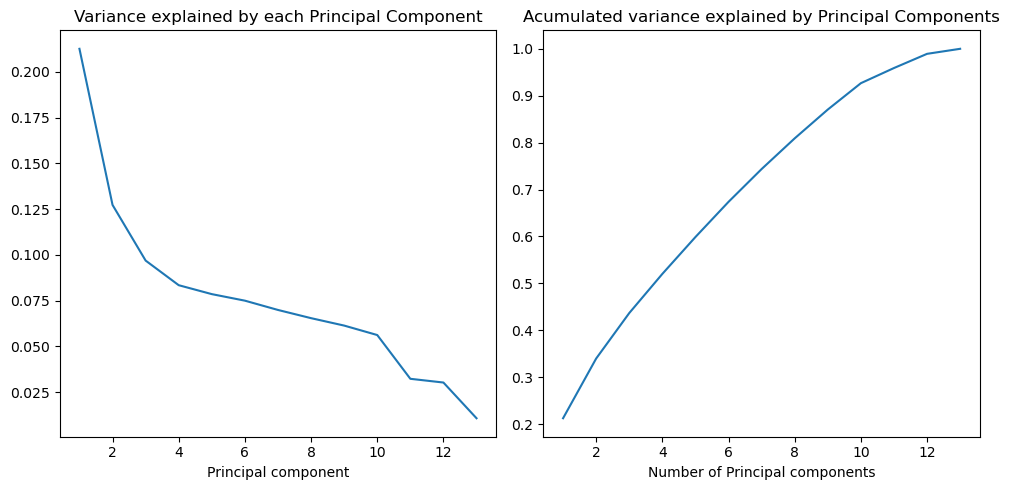

In [32]:
# We plot the variance and accumulated variance to see if we can spot a clear elbow
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(np.arange(1,14), pca.explained_variance_ratio_)
ax[0].set_xlabel("Principal component")
ax[0].set_title("Variance explained by each Principal Component")
ax[1].plot(np.arange(1,14),cumulated_explained_variance_ratio)
ax[1].set_title("Acumulated variance explained by Principal Components")
ax[1].set_xlabel("Number of Principal components")
plt.tight_layout()
plt.show()

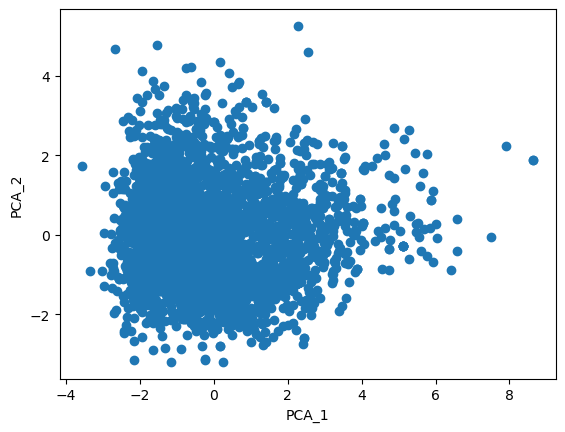

In [33]:
fig, ax = plt.subplots()
ax.scatter(principal_components_df['PCA_1'],principal_components_df['PCA_2'])
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
plt.show()

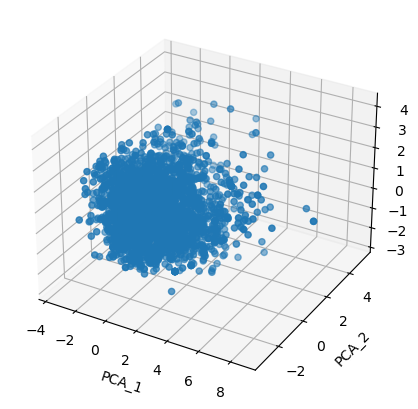

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principal_components_df['PCA_1'],principal_components_df['PCA_2'], principal_components_df['PCA_3'])
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("PCA_3")
plt.show()

In [35]:
# In order to reach proper accuracy with PCA, we need to use 8 elements from our dataframe to explain 80% of our data
# We will therefore explore ISOMAP and UMAP , as they might perform better in this situation

# ISOMAP

In [36]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=12, n_components=2)
iso.fit(X)
X_isomap_transformed = iso.transform(X)
X_isomap_transformed_df = pd.DataFrame(X_isomap_transformed, columns=["ISO_1","ISO_2"])
X_isomap_transformed_df.head()

,ISO_1,ISO_2
0,-85519.147129,-288.314780
1,5742.446869,83.487704
2,-92058.333801,-343.742328
3,7927.541530,76.234715
4,3368.710483,306.650265


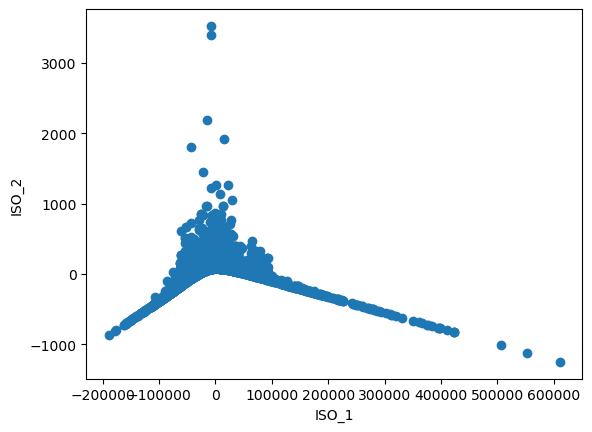

In [37]:
fig, ax = plt.subplots()
ax.scatter(X_isomap_transformed_df['ISO_1'],X_isomap_transformed_df['ISO_2'])
ax.set_xlabel("ISO_1")
ax.set_ylabel("ISO_2")
plt.show()

In [38]:
# ISOMAP is not showing performing well, and therefore we will check if UMAP obtains better results

# UMAP


In [39]:
from umap import UMAP

reducer = UMAP(n_components=2,random_state=42)
reducer.fit(X)

filename = "umap.pickle" 

with open(filename, "wb") as file:
        pickle.dump(reducer,file)

X_umap_transformed = reducer.transform(X)
X_umap_transformed_df = pd.DataFrame(X_umap_transformed, columns=["UMAP_1","UMAP_2"])
X_umap_transformed_df.head()

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_1,UMAP_2
0,-4.477591,16.239981
1,14.479293,-2.538724
2,-1.962476,19.257143
3,16.067223,-3.562404
4,12.245742,-0.901009


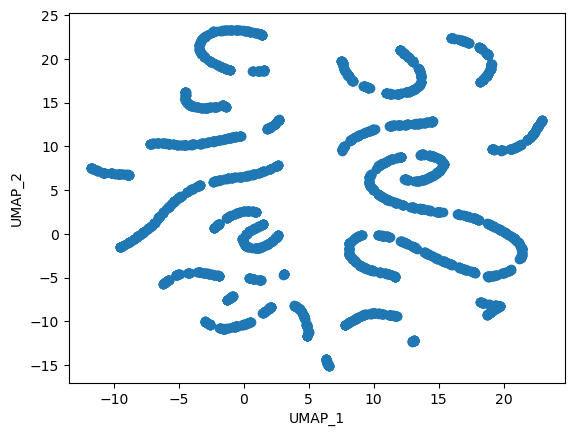

In [40]:
fig, ax = plt.subplots()
ax. scatter(X_umap_transformed_df ['UMAP_1'], X_umap_transformed_df['UMAP_2'])
ax.set_xlabel("UMAP_1")
ax. set_ylabel("UMAP_2")
plt.show()

In [41]:
# UMAP is showing the best results, as we are able to obtain clusters from it
# We will proceed to use UMAP as our dimensionality reduction technique 

# K-Means

Training a K-Means model with 2 clusters! 

Initialization complete


C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 51207.43053283384.
Iteration 1, inertia 37162.941252496246.
Iteration 2, inertia 36863.43745551792.
Iteration 3, inertia 36741.316831142394.
Iteration 4, inertia 36542.08443068707.
Iteration 5, inertia 36026.79160448428.
Iteration 6, inertia 35202.8906625752.
Iteration 7, inertia 34675.65033584855.
Iteration 8, inertia 34513.915877157604.
Iteration 9, inertia 34454.10893325912.
Iteration 10, inertia 34431.16780053853.
Iteration 11, inertia 34424.48684113931.
Iteration 12, inertia 34422.239425804706.
Iteration 13, inertia 34422.00187248885.
Converged at iteration 13: center shift 3.1107992708971204e-05 within tolerance 0.0001000000000000004.
Initialization complete
Iteration 0, inertia 59916.35970747342.
Iteration 1, inertia 37948.96521933975.
Iteration 2, inertia 36294.69122807997.
Iteration 3, inertia 35099.85311190486.
Iteration 4, inertia 34695.11257528861.
Iteration 5, inertia 34545.86296546166.
Iteration 6, inertia 34484.16423577769.
Iteration 7, inertia 34454

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 57377.01178462303.
Iteration 1, inertia 33940.592622162556.
Iteration 2, inertia 33584.81643833339.
Iteration 3, inertia 33526.83414651802.
Iteration 4, inertia 33509.48863163404.
Iteration 5, inertia 33504.415792578686.
Iteration 6, inertia 33498.851110794494.
Iteration 7, inertia 33492.83752836671.
Iteration 8, inertia 33491.52667471849.
Iteration 9, inertia 33491.24004632878.
Converged at iteration 9: center shift 3.316818614157181e-05 within tolerance 0.0001000000000000004.
Initialization complete
Iteration 0, inertia 51925.79943648176.
Iteration 1, inertia 34167.121469133475.
Iteration 2, inertia 32707.87295169168.
Iteration 3, inertia 32367.478530520602.
Iteration 4, inertia 32175.62243252997.
Iteration 5, inertia 32105.78760559977.
Iteration 6, inertia 32086.920323838072.
Iteration 7, inertia 32081.364805345.
Iteration 8, inertia 32079.82926438717.
Iteration 9, inertia 32078.699165256126.
Iteration 10, inertia 32077.562673210232.
Iteration 11, inertia 32077.

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 46784.76745466378.
Iteration 1, inertia 33622.41181574484.
Iteration 2, inertia 31954.511539452462.
Iteration 3, inertia 31129.81997778859.
Iteration 4, inertia 30818.94245365898.
Iteration 5, inertia 30624.067752772113.
Iteration 6, inertia 30457.348346693292.
Iteration 7, inertia 30356.8200040562.
Iteration 8, inertia 30307.519118633267.
Iteration 9, inertia 30276.054646424836.
Iteration 10, inertia 30255.302218175326.
Iteration 11, inertia 30239.45044773457.
Iteration 12, inertia 30226.489073734054.
Iteration 13, inertia 30208.09768296747.
Iteration 14, inertia 30185.570229301287.
Iteration 15, inertia 30159.429345350178.
Iteration 16, inertia 30132.467692055292.
Iteration 17, inertia 30097.208523862584.
Iteration 18, inertia 30039.76811679334.
Iteration 19, inertia 30014.499143984925.
Iteration 20, inertia 29998.03092563402.
Iteration 21, inertia 29989.187098671584.
Iteration 22, inertia 29984.851199607.
Iteration 23, inertia 29979.4056877418.
Iteration 24, ine

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 4, inertia 29267.96387546882.
Iteration 5, inertia 28813.090137569758.
Iteration 6, inertia 28476.547716636895.
Iteration 7, inertia 28349.297705711233.
Iteration 8, inertia 28292.797258813393.
Iteration 9, inertia 28273.40795975917.
Iteration 10, inertia 28267.680933413696.
Iteration 11, inertia 28264.97604958286.
Iteration 12, inertia 28262.9248441164.
Iteration 13, inertia 28259.364349477757.
Iteration 14, inertia 28254.46337793095.
Iteration 15, inertia 28250.165359464605.
Iteration 16, inertia 28244.927557128423.
Iteration 17, inertia 28239.738029499753.
Iteration 18, inertia 28238.007788684346.
Iteration 19, inertia 28237.57327381638.
Iteration 20, inertia 28237.26860447599.
Iteration 21, inertia 28237.046829371313.
Iteration 22, inertia 28236.748217498298.
Iteration 23, inertia 28236.568831575536.
Iteration 24, inertia 28236.371962266625.
Iteration 25, inertia 28236.271359774397.
Converged at iteration 25: strict convergence.
Initialization complete
Iteration 0, inerti

Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 37443.08703727159.
Iteration 1, inertia 28530.796349109365.
Iteration 2, inertia 27144.734679550806.
Iteration 3, inertia 26920.712763424897.
Iteration 4, inertia 26865.224096842234.
Iteration 5, inertia 26847.09336461701.
Iteration 6, inertia 26835.45003529902.
Iteration 7, inertia 26828.092569580993.
Iteration 8, inertia 26824.811744783136.
Iteration 9, inertia 26822.91273233071.
Iteration 10, inertia 26820.817105764567.
Iteration 11, inertia 26817.392948789144.
Iteration 12, inertia 26813.673866741774.
Iteration 13, inertia 26812.963107798234.
Iteration 14, inertia 26812.057874520164.
Iteration 15, inertia 26811.861670568527.
Iteration 16, inertia 26811.717039768075.
Converged at iteration 16: center shift 7.222180736268681e-05 within tolerance 0.0001000000000000004.
Initialization complete
Iteration 0, inertia 34642.40113309777.
Iteration 1, inertia 28831.941499392964.
Iteration 2, inertia 2773

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 38479.0940686129.
Iteration 1, inertia 28979.34518338927.
Iteration 2, inertia 28222.271593209814.
Iteration 3, inertia 27877.263222647114.
Iteration 4, inertia 27680.460752269886.
Iteration 5, inertia 27533.354537016832.
Iteration 6, inertia 27417.868018800305.
Iteration 7, inertia 27287.43891133816.
Iteration 8, inertia 27152.407242087607.
Iteration 9, inertia 27031.44686593271.
Iteration 10, inertia 26962.163914219855.
Iteration 11, inertia 26913.289183250057.
Iteration 12, inertia 26884.37337475502.
Iteration 13, inertia 26856.99727570889.
Iteration 14, inertia 26832.345051207.
Iteration 15, inertia 26792.281703919984.
Iteration 16, inertia 26693.492306817217.
Iteration 17, inertia 26607.825199395014.
Iteration 18, inertia 26578.311256895002.
Iteration 19, inertia 26567.708169458005.
Iteration 20, inertia 26563.844670859682.
Iteration 21, inertia 26561.831076898194.
Iteration 22, inertia 26560.860907045288.
Iteration 23, inertia 26560.02752237205.
Iteration 24,

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 35767.58642840692.
Iteration 1, inertia 27671.69559285965.
Iteration 2, inertia 26401.017551752244.
Iteration 3, inertia 26092.5665135251.
Iteration 4, inertia 25999.90210093816.
Iteration 5, inertia 25966.133616600193.
Iteration 6, inertia 25938.54418063927.
Iteration 7, inertia 25910.0096797788.
Iteration 8, inertia 25858.838110662393.
Iteration 9, inertia 25791.61357873283.
Iteration 10, inertia 25736.531744524502.
Iteration 11, inertia 25660.20093044499.
Iteration 12, inertia 25575.68928939644.
Iteration 13, inertia 25514.31677985451.
Iteration 14, inertia 25481.391112781064.
Iteration 15, inertia 25457.540257296765.
Iteration 16, inertia 25446.37262509443.
Iteration 17, inertia 25442.207500372868.
Iteration 18, inertia 25437.64936591075.
Iteration 19, inertia 25434.11542253421.
Iteration 20, inertia 25431.62364901863.
Iteration 21, inertia 25430.467353850407.
Iteration 22, inertia 25430.11905513622.
Converged at iteration 22: center shi

Iteration 0, inertia 36987.813528484585.
Iteration 1, inertia 28635.433308745334.
Iteration 2, inertia 27738.59373928167.
Iteration 3, inertia 27377.895851458947.
Iteration 4, inertia 27178.320172415457.
Iteration 5, inertia 27028.41248549187.
Iteration 6, inertia 26921.209162006868.
Iteration 7, inertia 26826.32944661246.
Iteration 8, inertia 26717.617828026618.
Iteration 9, inertia 26603.656247250037.
Iteration 10, inertia 26438.514731168427.
Iteration 11, inertia 26015.375148070583.
Iteration 12, inertia 25770.78818430206.
Iteration 13, inertia 25718.542756812458.
Iteration 14, inertia 25667.743195462714.
Iteration 15, inertia 25624.25686170643.
Iteration 16, inertia 25585.87504418612.
Iteration 17, inertia 25569.717431718484.
Iteration 18, inertia 25552.108149512896.
Iteration 19, inertia 25531.671326165007.
Iteration 20, inertia 25514.28410106201.
Iteration 21, inertia 25466.68118867866.
Iteration 22, inertia 25358.90845867579.
Iteration 23, inertia 25262.890715220958.
Iteration 2

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 35149.4846977711.
Iteration 1, inertia 27159.351064419498.
Iteration 2, inertia 25952.89755676336.
Iteration 3, inertia 25623.309341773936.
Iteration 4, inertia 25380.52597004715.
Iteration 5, inertia 25210.164279571043.
Iteration 6, inertia 25076.560069916362.
Iteration 7, inertia 24986.68288750044.
Iteration 8, inertia 24931.42265863672.
Iteration 9, inertia 24907.040738088734.
Iteration 10, inertia 24894.129609147774.
Iteration 11, inertia 24881.672537873783.
Iteration 12, inertia 24866.552439632476.
Iteration 13, inertia 24835.974250566855.
Iteration 14, inertia 24821.833700435884.
Iteration 15, inertia 24809.93491272817.
Iteration 16, inertia 24799.905222901063.
Iteration 17, inertia 24793.950992436447.
Iteration 18, inertia 24790.323848962733.
Iteration 19, inertia 24785.516050588496.
Iteration 20, inertia 24781.532285252404.
Iteration 21, inertia 24776.820989593936.
Iteration 22, inertia 24773.902743503284.
Iteration 23, inertia 24771

Iteration 0, inertia 34514.760581113456.
Iteration 1, inertia 27163.511296304132.
Iteration 2, inertia 25616.334366538158.
Iteration 3, inertia 24807.37536087839.
Iteration 4, inertia 24476.9661780461.
Iteration 5, inertia 24364.974496427665.
Iteration 6, inertia 24332.976061351783.
Iteration 7, inertia 24316.96218382162.
Iteration 8, inertia 24311.972487450053.
Iteration 9, inertia 24308.225085636484.
Iteration 10, inertia 24303.853552262965.
Iteration 11, inertia 24298.278123073003.
Iteration 12, inertia 24295.416629543804.
Iteration 13, inertia 24292.49396085986.
Iteration 14, inertia 24287.587701741737.
Iteration 15, inertia 24279.667189556898.
Iteration 16, inertia 24263.620839593557.
Iteration 17, inertia 24221.827026344865.
Iteration 18, inertia 24150.36456896832.
Iteration 19, inertia 24097.943164873683.
Iteration 20, inertia 24048.633026736177.
Iteration 21, inertia 24004.08190534517.
Iteration 22, inertia 23983.42917034032.
Iteration 23, inertia 23976.577088464554.
Iteration 

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 31852.331768588258.
Iteration 1, inertia 25901.225478295644.
Iteration 2, inertia 24726.07410421402.
Iteration 3, inertia 24184.19096087665.
Iteration 4, inertia 23942.753049719995.
Iteration 5, inertia 23849.927403168942.
Iteration 6, inertia 23815.860143786304.
Iteration 7, inertia 23797.237761221197.
Iteration 8, inertia 23783.863128701247.
Iteration 9, inertia 23762.966563445858.
Iteration 10, inertia 23751.301999431438.
Iteration 11, inertia 23742.849309666766.
Iteration 12, inertia 23733.177315168527.
Iteration 13, inertia 23712.02545289452.
Iteration 14, inertia 23658.63461872863.
Iteration 15, inertia 23600.600003302934.
Iteration 16, inertia 23532.67972570039.
Iteration 17, inertia 23454.36913972271.
Iteration 18, inertia 23351.263014580305.
Iteration 19, inertia 23155.831129697413.
Iteration 20, inertia 22902.437630756893.
Iteration 21, inertia 22803.669265018332.
Iteration 22, inertia 22773.998937231994.
Iteration 23, inertia 22757.343144946568.
Iteratio

Training a K-Means model with 10 clusters! 

Initialization complete
Iteration 0, inertia 32538.978033624626.
Iteration 1, inertia 24317.32419144423.
Iteration 2, inertia 23205.610548744717.
Iteration 3, inertia 22816.65208387807.
Iteration 4, inertia 22586.028044609247.
Iteration 5, inertia 22431.099654213653.
Iteration 6, inertia 22341.06606818769.
Iteration 7, inertia 22305.619568196984.
Iteration 8, inertia 22286.640066831802.
Iteration 9, inertia 22272.26250604161.
Iteration 10, inertia 22265.101189868183.
Iteration 11, inertia 22260.400542347434.
Iteration 12, inertia 22258.357768954535.
Iteration 13, inertia 22257.212001612774.
Iteration 14, inertia 22256.442365878083.
Iteration 15, inertia 22255.288259613786.
Iteration 16, inertia 22253.118177574703.
Iteration 17, inertia 22252.04805131543.
Iteration 18, inertia 22251.123486493132.
Iteration 19, inertia 22247.80497473281.
Iteration 20, inertia 22244.940854278742.
Iteration 21, inertia 22243.56169146949.
Iteration 22, inertia 22

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 33761.292023839254.
Iteration 1, inertia 25527.10426537716.
Iteration 2, inertia 24699.720809497456.
Iteration 3, inertia 24305.07421251329.
Iteration 4, inertia 23888.46097945033.
Iteration 5, inertia 23638.791823682892.
Iteration 6, inertia 23517.801375760293.
Iteration 7, inertia 23364.29090091205.
Iteration 8, inertia 23151.435762601337.
Iteration 9, inertia 23056.115685141012.
Iteration 10, inertia 23019.918682240077.
Iteration 11, inertia 22997.408226223386.
Iteration 12, inertia 22979.62852142463.
Iteration 13, inertia 22965.396124104445.
Iteration 14, inertia 22954.595029534725.
Iteration 15, inertia 22939.120467232693.
Iteration 16, inertia 22928.404884511427.
Iteration 17, inertia 22922.274558951915.
Iteration 18, inertia 22917.411545570605.
Iteration 19, inertia 22909.397126439464.
Iteration 20, inertia 22899.750129721066.
Iteration 21, inertia 22891.387886390512.
Iteration 22, inertia 22885.16303413798.
Iteration 23, inertia 22879.893388909866.
Iteratio

Training a K-Means model with 11 clusters! 

Initialization complete
Iteration 0, inertia 31710.344941400428.
Iteration 1, inertia 23998.787928909544.
Iteration 2, inertia 22955.00911735997.
Iteration 3, inertia 22693.55387765749.
Iteration 4, inertia 22480.10787916476.
Iteration 5, inertia 22239.67544867768.
Iteration 6, inertia 22006.646312129138.
Iteration 7, inertia 21847.609328997816.
Iteration 8, inertia 21763.795069597436.
Iteration 9, inertia 21729.365169811437.
Iteration 10, inertia 21713.84542801525.
Iteration 11, inertia 21703.76073195799.
Iteration 12, inertia 21696.38014816392.
Iteration 13, inertia 21691.445530020945.
Iteration 14, inertia 21688.49607019926.
Iteration 15, inertia 21679.70787139877.
Iteration 16, inertia 21674.06503140786.
Iteration 17, inertia 21667.489275921133.
Iteration 18, inertia 21657.572988144406.
Iteration 19, inertia 21654.44022594372.
Iteration 20, inertia 21652.68468719585.
Iteration 21, inertia 21652.06757855097.
Iteration 22, inertia 21651.72

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 31595.61604126859.
Iteration 1, inertia 23719.588228932567.
Iteration 2, inertia 22754.4383317261.
Iteration 3, inertia 22543.261255357418.
Iteration 4, inertia 22450.092890366774.
Iteration 5, inertia 22389.560429229394.
Iteration 6, inertia 22344.497435868354.
Iteration 7, inertia 22273.17788470447.
Iteration 8, inertia 22180.040226223377.
Iteration 9, inertia 22058.531780669742.
Iteration 10, inertia 21939.07873451547.
Iteration 11, inertia 21850.666277495144.
Iteration 12, inertia 21788.035332949807.
Iteration 13, inertia 21758.71483040881.
Iteration 14, inertia 21744.255783163524.
Iteration 15, inertia 21732.851001805204.
Iteration 16, inertia 21724.817590773346.
Iteration 17, inertia 21719.29726827436.
Iteration 18, inertia 21715.51305182832.
Iteration 19, inertia 21714.111525830725.
Iteration 20, inertia 21713.643880306434.
Iteration 21, inertia 21713.480041446597.
Iteration 22, inertia 21712.90851199856.
Iteration 23, inertia 21712.42507474264.
Iteration 24

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 30056.992944379173.
Iteration 1, inertia 23406.950584486753.
Iteration 2, inertia 22423.683490211668.
Iteration 3, inertia 22090.196846872273.
Iteration 4, inertia 21771.13977205938.
Iteration 5, inertia 21340.4019689889.
Iteration 6, inertia 21176.112016046354.
Iteration 7, inertia 21116.621913474435.
Iteration 8, inertia 21064.845538136615.
Iteration 9, inertia 21037.38121197994.
Iteration 10, inertia 21004.415148044893.
Iteration 11, inertia 20977.244854568205.
Iteration 12, inertia 20956.43797910373.
Iteration 13, inertia 20938.265351394566.
Iteration 14, inertia 20932.827609875352.
Iteration 15, inertia 20928.857518597026.
Iteration 16, inertia 20925.26454264739.
Iteration 17, inertia 20923.511079589447.
Iteration 18, inertia 20921.842588690335.
Iteration 19, inertia 20919.055207884594.
Iteration 20, inertia 20916.088687402185.
Iteration 21, inertia 20915.047945796083.
Iteration 22, inertia 20913.982636480207.
Iteration 23, inertia 2091

Iteration 0, inertia 31158.193491091683.
Iteration 1, inertia 24259.8812224108.
Iteration 2, inertia 23479.671827475766.
Iteration 3, inertia 22981.79773662083.
Iteration 4, inertia 22666.54410638897.
Iteration 5, inertia 22349.66887474798.
Iteration 6, inertia 22049.9471122662.
Iteration 7, inertia 21841.5089257992.
Iteration 8, inertia 21736.82486380257.
Iteration 9, inertia 21672.883534091576.
Iteration 10, inertia 21619.83019594871.
Iteration 11, inertia 21565.24036407067.
Iteration 12, inertia 21512.450639114548.
Iteration 13, inertia 21469.056027369537.
Iteration 14, inertia 21436.57639180073.
Iteration 15, inertia 21420.94150953999.
Iteration 16, inertia 21410.66330484701.
Iteration 17, inertia 21399.093954603417.
Iteration 18, inertia 21388.430287714506.
Iteration 19, inertia 21385.39868271215.
Iteration 20, inertia 21382.206183699076.
Iteration 21, inertia 21381.972400735318.
Iteration 22, inertia 21381.56412731569.
Iteration 23, inertia 21378.378203919438.
Iteration 24, inert

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 29882.48164831414.
Iteration 1, inertia 23345.87491833276.
Iteration 2, inertia 21994.779656579954.
Iteration 3, inertia 21408.693969602315.
Iteration 4, inertia 21186.273906491086.
Iteration 5, inertia 21066.222115523433.
Iteration 6, inertia 20977.529593209554.
Iteration 7, inertia 20920.409350817084.
Iteration 8, inertia 20859.615824128858.
Iteration 9, inertia 20800.830065081384.
Iteration 10, inertia 20740.61987045899.
Iteration 11, inertia 20672.13532486766.
Iteration 12, inertia 20633.82619151567.
Iteration 13, inertia 20594.87827701689.
Iteration 14, inertia 20574.18021609584.
Iteration 15, inertia 20562.59825128478.
Iteration 16, inertia 20546.64808551542.
Iteration 17, inertia 20537.759448657387.
Iteration 18, inertia 20529.06681598984.
Iteration 19, inertia 20524.2209201058.
Iteration 20, inertia 20516.67064139971.
Iteration 21, inertia 20507.079548011512.
Iteration 22, inertia 20504.01783626274.
Iteration 23, inertia 20500.601000

Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 28420.013429410472.
Iteration 1, inertia 22489.5752488089.
Iteration 2, inertia 21673.864735855226.
Iteration 3, inertia 21094.327231997897.
Iteration 4, inertia 20564.682484596895.
Iteration 5, inertia 20408.567355289877.
Iteration 6, inertia 20351.1769415389.
Iteration 7, inertia 20330.810645840545.
Iteration 8, inertia 20321.901289028167.
Iteration 9, inertia 20316.644908420465.
Iteration 10, inertia 20312.69842897621.
Iteration 11, inertia 20310.204743095226.
Iteration 12, inertia 20309.04788518886.
Iteration 13, inertia 20307.90864204959.
Iteration 14, inertia 20306.517130842367.
Iteration 15, inertia 20304.952750563152.
Iteration 16, inertia 20303.66354397681.
Iteration 17, inertia 20301.72570988789.
Iteration 18, inertia 20299.270576296974.
Iteration 19, inertia 20296.454526116577.
Iteration 20, inertia 20294.736400925533.
Iteration 21, inertia 20293.16820961993.
Iteration 22, inertia 20292

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 29300.532954641152.
Iteration 1, inertia 22075.755280745445.
Iteration 2, inertia 21074.6368382651.
Iteration 3, inertia 20803.324429212636.
Iteration 4, inertia 20678.490367013146.
Iteration 5, inertia 20572.244708084912.
Iteration 6, inertia 20479.931684749692.
Iteration 7, inertia 20419.718325709953.
Iteration 8, inertia 20367.244536037026.
Iteration 9, inertia 20313.23588375863.
Iteration 10, inertia 20246.625951137386.
Iteration 11, inertia 20138.805243370687.
Iteration 12, inertia 20044.979954787952.
Iteration 13, inertia 19987.994969240543.
Iteration 14, inertia 19956.072698955923.
Iteration 15, inertia 19940.82228860001.
Iteration 16, inertia 19931.492026571785.
Iteration 17, inertia 19924.424324195465.
Iteration 18, inertia 19917.19878594865.
Iteration 19, inertia 19912.989857251036.
Iteration 20, inertia 19910.126378999725.
Iteration 21, inertia 19907.879099554368.
Iteration 22, inertia 19905.690774991977.
Iteration 23, inertia 19903.165224773085.
Iterati

Training a K-Means model with 15 clusters! 

Initialization complete
Iteration 0, inertia 27716.12037429382.
Iteration 1, inertia 21776.634591030524.
Iteration 2, inertia 20855.679348897163.
Iteration 3, inertia 20400.080958414128.
Iteration 4, inertia 20152.55986997223.
Iteration 5, inertia 20022.900375674784.
Iteration 6, inertia 19961.876664437084.
Iteration 7, inertia 19937.25684930878.
Iteration 8, inertia 19917.697900218765.
Iteration 9, inertia 19895.390038902042.
Iteration 10, inertia 19887.597880808884.
Iteration 11, inertia 19883.155918065135.
Iteration 12, inertia 19880.400311653368.
Iteration 13, inertia 19877.79185467405.
Iteration 14, inertia 19876.203894155973.
Iteration 15, inertia 19872.574421681864.
Iteration 16, inertia 19857.662802552.
Iteration 17, inertia 19836.558601342673.
Iteration 18, inertia 19807.09990921907.
Iteration 19, inertia 19775.417259394282.
Iteration 20, inertia 19748.396720385575.
Iteration 21, inertia 19719.218674184074.
Iteration 22, inertia 197

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 27805.37835543608.
Iteration 1, inertia 21452.016134010453.
Iteration 2, inertia 20433.275202143286.
Iteration 3, inertia 20148.606367012937.
Iteration 4, inertia 20060.25442270347.
Iteration 5, inertia 20008.483473839548.
Iteration 6, inertia 19975.027941750428.
Iteration 7, inertia 19953.47233887903.
Iteration 8, inertia 19938.805665486703.
Iteration 9, inertia 19928.326607196937.
Iteration 10, inertia 19917.43207029035.
Iteration 11, inertia 19901.71080770079.
Iteration 12, inertia 19883.955498023977.
Iteration 13, inertia 19859.298562263277.
Iteration 14, inertia 19840.056035213227.
Iteration 15, inertia 19824.90431005709.
Iteration 16, inertia 19807.94529143824.
Iteration 17, inertia 19795.340571546985.
Iteration 18, inertia 19786.306875016788.
Iteration 19, inertia 19782.02273901811.
Iteration 20, inertia 19776.304862153553.
Iteration 21, inertia 19773.39407461902.
Iteration 22, inertia 19771.974934734582.
Iteration 23, inertia 19769.257347796232.
Iteration 2

Training a K-Means model with 16 clusters! 

Initialization complete
Iteration 0, inertia 27305.787111305748.
Iteration 1, inertia 21143.16468283508.
Iteration 2, inertia 20305.90829472094.
Iteration 3, inertia 20037.103361443846.
Iteration 4, inertia 19860.952879154436.
Iteration 5, inertia 19740.284700418997.
Iteration 6, inertia 19681.284304720153.
Iteration 7, inertia 19649.3847449107.
Iteration 8, inertia 19628.69521650728.
Iteration 9, inertia 19584.05562621395.
Iteration 10, inertia 19535.82099391826.
Iteration 11, inertia 19499.680972946884.
Iteration 12, inertia 19473.714448388564.
Iteration 13, inertia 19442.590629242983.
Iteration 14, inertia 19422.02321564743.
Iteration 15, inertia 19405.2845000071.
Iteration 16, inertia 19389.752274588027.
Iteration 17, inertia 19380.462237541313.
Iteration 18, inertia 19373.329758547883.
Iteration 19, inertia 19364.00140164506.
Iteration 20, inertia 19354.431485900037.
Iteration 21, inertia 19350.949162800083.
Iteration 22, inertia 19348.

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 26564.854766100867.
Iteration 1, inertia 20864.82017686721.
Iteration 2, inertia 20288.658291523236.
Iteration 3, inertia 20091.122135967933.
Iteration 4, inertia 19968.826389521753.
Iteration 5, inertia 19901.61675887557.
Iteration 6, inertia 19859.31501803523.
Iteration 7, inertia 19831.678008060342.
Iteration 8, inertia 19811.746289740084.
Iteration 9, inertia 19797.11975829351.
Iteration 10, inertia 19782.497445322806.
Iteration 11, inertia 19772.774496337075.
Iteration 12, inertia 19761.112859848618.
Iteration 13, inertia 19755.900087348953.
Iteration 14, inertia 19748.53930636756.
Iteration 15, inertia 19734.985758247814.
Iteration 16, inertia 19718.566036413547.
Iteration 17, inertia 19704.272464636662.
Iteration 18, inertia 19685.926844781956.
Iteration 19, inertia 19668.386380474225.
Iteration 20, inertia 19658.268125365146.
Iteration 21, inertia 19648.289346554116.
Iteration 22, inertia 19635.77197920344.
Iteration 23, inertia 19628.651665425306.
Iteratio

Training a K-Means model with 17 clusters! 

Initialization complete
Iteration 0, inertia 26853.464737888247.
Iteration 1, inertia 20924.90406696461.
Iteration 2, inertia 20065.545313980845.
Iteration 3, inertia 19782.873016635887.
Iteration 4, inertia 19554.51614652194.
Iteration 5, inertia 19330.163289498803.
Iteration 6, inertia 19203.452974178967.
Iteration 7, inertia 19136.238612944337.
Iteration 8, inertia 19100.61652405693.
Iteration 9, inertia 19065.195913915566.
Iteration 10, inertia 19014.920164775336.
Iteration 11, inertia 18993.208610864862.
Iteration 12, inertia 18986.01700819847.
Iteration 13, inertia 18981.592022808552.
Iteration 14, inertia 18978.372439603576.
Iteration 15, inertia 18974.57813921901.
Iteration 16, inertia 18972.662556174833.
Iteration 17, inertia 18971.626508610127.
Iteration 18, inertia 18969.909262205292.
Iteration 19, inertia 18969.063061134897.
Iteration 20, inertia 18967.089578262912.
Iteration 21, inertia 18960.7023169976.
Iteration 22, inertia 18

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 27661.43384554185.
Iteration 1, inertia 21455.052353765208.
Iteration 2, inertia 20337.96193437077.
Iteration 3, inertia 19736.5236579326.
Iteration 4, inertia 19548.9149028606.
Iteration 5, inertia 19445.670283987187.
Iteration 6, inertia 19403.77330192667.
Iteration 7, inertia 19384.808940211748.
Iteration 8, inertia 19375.052405650677.
Iteration 9, inertia 19367.75958282534.
Iteration 10, inertia 19363.66268390457.
Iteration 11, inertia 19358.89898150858.
Iteration 12, inertia 19353.584575671986.
Iteration 13, inertia 19348.25782817156.
Iteration 14, inertia 19343.928450448697.
Iteration 15, inertia 19334.777248886803.
Iteration 16, inertia 19324.323887552462.
Iteration 17, inertia 19313.405696446443.
Iteration 18, inertia 19303.334252150118.
Iteration 19, inertia 19295.181113842882.
Iteration 20, inertia 19287.185737201133.
Iteration 21, inertia 19278.93067118274.
Iteration 22, inertia 19271.750196196106.
Iteration 23, inertia 19266.8867158999.
Iteration 24, in

Training a K-Means model with 18 clusters! 

Initialization complete
Iteration 0, inertia 26450.251325927606.
Iteration 1, inertia 20603.51683651811.
Iteration 2, inertia 19652.804976098287.
Iteration 3, inertia 19341.791075071473.
Iteration 4, inertia 19167.14777301687.
Iteration 5, inertia 19001.882780037507.
Iteration 6, inertia 18882.919166311032.
Iteration 7, inertia 18811.03255096625.
Iteration 8, inertia 18773.717594287293.
Iteration 9, inertia 18745.66914740617.
Iteration 10, inertia 18717.910110436052.
Iteration 11, inertia 18705.316306133886.
Iteration 12, inertia 18697.873543702728.
Iteration 13, inertia 18678.008994182215.
Iteration 14, inertia 18667.50757203918.
Iteration 15, inertia 18663.128973308467.
Iteration 16, inertia 18658.71840365523.
Iteration 17, inertia 18656.653658194584.
Iteration 18, inertia 18656.30626212732.
Iteration 19, inertia 18656.182773092703.
Iteration 20, inertia 18656.09229737889.
Iteration 21, inertia 18655.94668999525.
Converged at iteration 21:

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 26496.818239741515.
Iteration 1, inertia 20545.19690966155.
Iteration 2, inertia 19546.94820932577.
Iteration 3, inertia 19257.128610170315.
Iteration 4, inertia 19146.08216527963.
Iteration 5, inertia 19099.09344730392.
Iteration 6, inertia 19058.00783607817.
Iteration 7, inertia 19021.38891252139.
Iteration 8, inertia 19000.343312553345.
Iteration 9, inertia 18985.851271117135.
Iteration 10, inertia 18972.451999936515.
Iteration 11, inertia 18959.67705800181.
Iteration 12, inertia 18948.600776168067.
Iteration 13, inertia 18938.49921427613.
Iteration 14, inertia 18932.827429076446.
Iteration 15, inertia 18926.8734884343.
Iteration 16, inertia 18921.33764648837.
Iteration 17, inertia 18918.05408437309.
Iteration 18, inertia 18915.010140980896.
Iteration 19, inertia 18906.548262352062.
Iteration 20, inertia 18893.042948984825.
Iteration 21, inertia 18886.55238125271.
Iteration 22, inertia 18880.760098239232.
Iteration 23, inertia 18877.71814451321.
Iteration 24, in

Training a K-Means model with 19 clusters! 

Initialization complete
Iteration 0, inertia 25795.10906592048.
Iteration 1, inertia 20168.777208993808.
Iteration 2, inertia 19290.499757024732.
Iteration 3, inertia 19010.17975883142.
Iteration 4, inertia 18881.209550078045.
Iteration 5, inertia 18752.853470039234.
Iteration 6, inertia 18651.682055277684.
Iteration 7, inertia 18591.82892216618.
Iteration 8, inertia 18546.32415078217.
Iteration 9, inertia 18516.338425471728.
Iteration 10, inertia 18495.248914968593.
Iteration 11, inertia 18483.627729313324.
Iteration 12, inertia 18461.5130005451.
Iteration 13, inertia 18450.8904916361.
Iteration 14, inertia 18445.803355073193.
Iteration 15, inertia 18443.90192545716.
Iteration 16, inertia 18443.46350475056.
Iteration 17, inertia 18442.478644697196.
Iteration 18, inertia 18440.563356832878.
Iteration 19, inertia 18439.900698137382.
Iteration 20, inertia 18438.87929196388.
Iteration 21, inertia 18437.19572379754.
Iteration 22, inertia 18435.8

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 26743.453943909546.
Iteration 1, inertia 19938.354031019644.
Iteration 2, inertia 19118.182520355076.
Iteration 3, inertia 18766.42493671868.
Iteration 4, inertia 18588.827341334458.
Iteration 5, inertia 18512.766171231862.
Iteration 6, inertia 18481.174407382787.
Iteration 7, inertia 18464.281231841742.
Iteration 8, inertia 18456.62797093473.
Iteration 9, inertia 18450.870553214612.
Iteration 10, inertia 18448.18749914114.
Iteration 11, inertia 18445.2720377106.
Iteration 12, inertia 18441.398878924047.
Iteration 13, inertia 18439.02143145095.
Iteration 14, inertia 18437.827189941974.
Iteration 15, inertia 18436.63912016693.
Iteration 16, inertia 18434.9721922984.
Iteration 17, inertia 18434.736934621087.
Iteration 18, inertia 18434.646870926776.
Iteration 19, inertia 18434.61352756634.
Iteration 20, inertia 18434.45768421674.
Iteration 21, inertia 18433.635522359.
Iteration 22, inertia 18432.24716766102.
Iteration 23, inertia 18430.180672191826.
Iteration 24, ine

Training a K-Means model with 20 clusters! 

Initialization complete
Iteration 0, inertia 25400.233762591008.
Iteration 1, inertia 19886.55247903798.
Iteration 2, inertia 18981.622808943044.
Iteration 3, inertia 18633.06385950275.
Iteration 4, inertia 18466.674382152087.
Iteration 5, inertia 18364.996214959952.
Iteration 6, inertia 18311.76567105297.
Iteration 7, inertia 18298.14164328603.
Iteration 8, inertia 18291.70472008951.
Iteration 9, inertia 18288.774777171475.
Iteration 10, inertia 18286.123942087703.
Iteration 11, inertia 18283.88880194365.
Iteration 12, inertia 18262.433790734183.
Iteration 13, inertia 18249.58278484323.
Iteration 14, inertia 18246.99580270544.
Iteration 15, inertia 18245.124547542764.
Iteration 16, inertia 18243.942824035723.
Iteration 17, inertia 18243.363674515735.
Iteration 18, inertia 18243.120019234284.
Iteration 19, inertia 18243.05255595624.
Iteration 20, inertia 18242.988315280785.
Iteration 21, inertia 18242.82058159644.
Converged at iteration 21: 

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 25292.178154007477.
Iteration 1, inertia 19739.21092590878.
Iteration 2, inertia 18937.76502716967.
Iteration 3, inertia 18689.31406146773.
Iteration 4, inertia 18595.86437876807.
Iteration 5, inertia 18548.650296999396.
Iteration 6, inertia 18503.925204526935.
Iteration 7, inertia 18460.711432539796.
Iteration 8, inertia 18433.810014052884.
Iteration 9, inertia 18402.261258538765.
Iteration 10, inertia 18383.06855125231.
Iteration 11, inertia 18372.49703654774.
Iteration 12, inertia 18366.292085858502.
Iteration 13, inertia 18356.02465598327.
Iteration 14, inertia 18346.248164546654.
Iteration 15, inertia 18340.91153303689.
Iteration 16, inertia 18336.150447817115.
Iteration 17, inertia 18333.940328131743.
Iteration 18, inertia 18333.20067729294.
Iteration 19, inertia 18332.83597949324.
Iteration 20, inertia 18332.534516028805.
Iteration 21, inertia 18331.6343125786.
Iteration 22, inertia 18330.620510233726.
Iteration 23, inertia 18329.584586195593.
Iteration 24, 

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

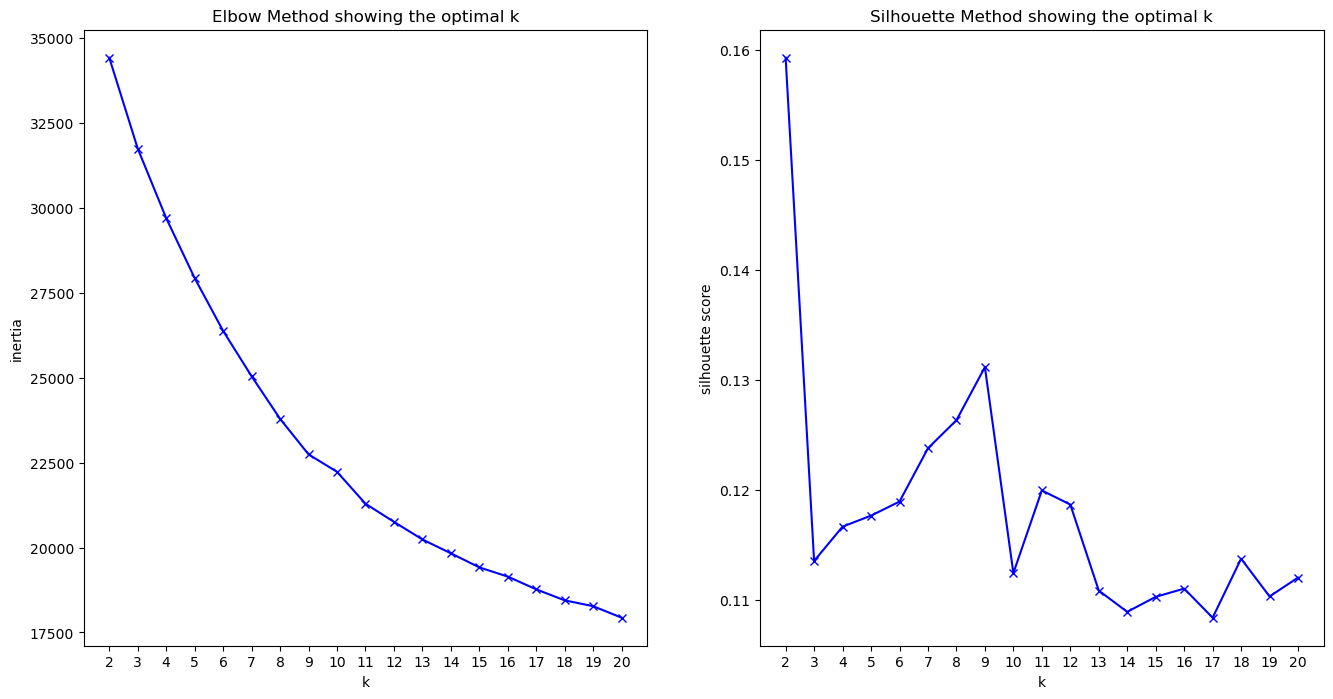

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# We check the different K values to try to find the best one.
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)

    filename = "kmeans_" + str(k) + ".pickle" # Path with filename # kmeans_n.pickle
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [43]:
# We checked the different K values to try to find the best one.
# Having a look at the inertia and the silhouette values, we can state that this modelling does not seem to perform best
# We will attempt to cluster with HDBSCAN, to see if it performs better

In [44]:
# We apply the umap model to the scaled df
umap_representation = reducer.transform(X)
umap_df= pd.DataFrame(umap_representation,columns=["UMAP_1","UMAP_2"])
umap_df.head()

,UMAP_1,UMAP_2
0,-4.477591,16.239981
1,14.479293,-2.538724
2,-1.962476,19.257143
3,16.067223,-3.562404
4,12.245742,-0.901009


In [45]:
# We fit the HDBSCAN to the umap representation to obtain the clusters
from sklearn.cluster import HDBSCAN

clusterer = HDBSCAN()
labels = clusterer.fit_predict(umap_representation)

In [46]:
umap_df['cluster'] = labels
umap_df.head()

,UMAP_1,UMAP_2,cluster
0,-4.477591,16.239981,17
1,14.479293,-2.538724,-1
2,-1.962476,19.257143,123
3,16.067223,-3.562404,240
4,12.245742,-0.901009,259


In [47]:
# We check the number of labels / clusters
len(np.unique(labels))

298

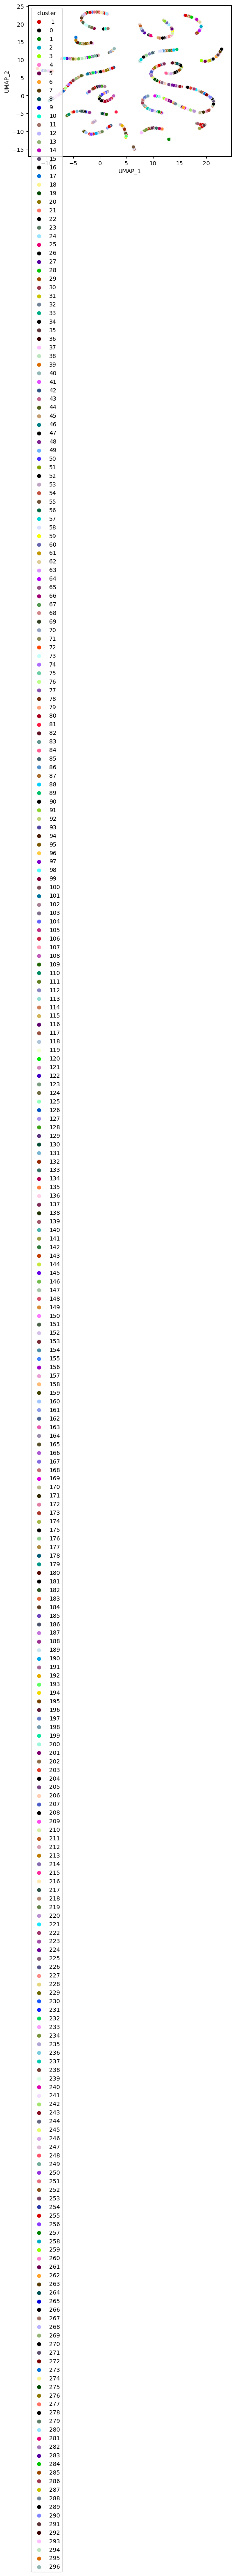

In [68]:
# We plot the df to see the distribution of each cluster
import seaborn as sns
import colorcet as cc

# Creating a pallette of hihg contrast colors with as many color as cluster labels
custom_palette = sns.color_palette(cc.glasbey, n_colors=len(set(labels)))

# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1"
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(labels,custom_palette)]
sns.scatterplot(umap_df, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette);
plt.show()

In [50]:
# Get unique labels and their counts
unique_labels, counts = np.unique(labels, return_counts=True)

# Display the counts
for label, count in zip(unique_labels, counts):
    print(f"Label {label}: {count} occurrences")

Label -1: 176 occurrences
Label 0: 5 occurrences
Label 1: 23 occurrences
Label 2: 15 occurrences
Label 3: 6 occurrences
Label 4: 7 occurrences
Label 5: 10 occurrences
Label 6: 10 occurrences
Label 7: 15 occurrences
Label 8: 9 occurrences
Label 9: 14 occurrences
Label 10: 9 occurrences
Label 11: 15 occurrences
Label 12: 6 occurrences
Label 13: 5 occurrences
Label 14: 17 occurrences
Label 15: 5 occurrences
Label 16: 9 occurrences
Label 17: 10 occurrences
Label 18: 6 occurrences
Label 19: 14 occurrences
Label 20: 14 occurrences
Label 21: 10 occurrences
Label 22: 9 occurrences
Label 23: 7 occurrences
Label 24: 12 occurrences
Label 25: 8 occurrences
Label 26: 14 occurrences
Label 27: 9 occurrences
Label 28: 9 occurrences
Label 29: 9 occurrences
Label 30: 6 occurrences
Label 31: 10 occurrences
Label 32: 6 occurrences
Label 33: 7 occurrences
Label 34: 7 occurrences
Label 35: 7 occurrences
Label 36: 9 occurrences
Label 37: 8 occurrences
Label 38: 16 occurrences
Label 39: 11 occurrences
Label 4

In [ ]:
# The HDBSCAN is returning too many labels and is not properly clustering the samples
# We will check if the DBSCAN performs better

In [102]:
from sklearn.cluster import DBSCAN
clusterer2 = DBSCAN(eps=1)
labels2= clusterer2.fit_predict(umap_representation)

In [103]:
umap_df2= umap_df.copy()

In [134]:
umap_df2['dbscan_cluster'] = labels2
umap_df2.head()

,UMAP_1,UMAP_2,cluster,dbscan_cluster
0,-4.477591,16.239981,0,0
1,14.479293,-2.538724,1,1
2,-1.962476,19.257143,2,2
3,16.067223,-3.562404,1,1
4,12.245742,-0.901009,1,1


In [120]:
umap_df2.to_csv('../../../Song_recommender/song_recommender/umap_df.csv')

In [121]:
len(np.unique(labels2))

33

C:\Users\e.sansebastian\AppData\Local\Temp\ipykernel_3704\2397155322.py:4: UserWarning: The palette list has more values (3088) than needed (33), which may not be intended.
  sns.scatterplot(umap_df2, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette);


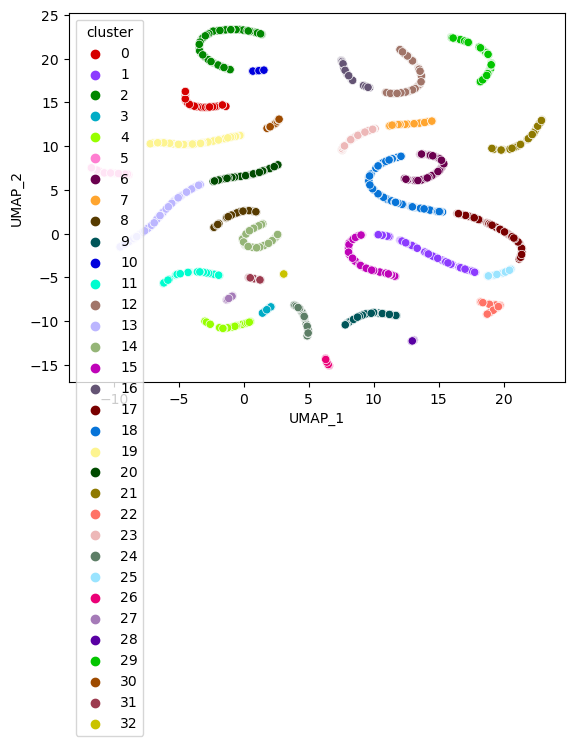

In [122]:
custom_palette = sns.color_palette(cc.glasbey, n_colors=labels2.size)
# Modifiying the palette to set the color "black=(0.,0.,0.)" to the label "-1"
custom_palette = [color if cluster != -1 else (0.,0.,0.) for cluster, color in zip(labels2,custom_palette)]
sns.scatterplot(umap_df2, x="UMAP_1", y="UMAP_2", hue="cluster", palette=custom_palette);
plt.show()

In [123]:
# Get unique labels and their counts
unique_labels2, counts2 = np.unique(labels2, return_counts=True)

# Display the counts
for label, count in zip(unique_labels2, counts2):
    print(f"Label {label}: {count} occurrences")

Label 0: 107 occurrences
Label 1: 153 occurrences
Label 2: 189 occurrences
Label 3: 37 occurrences
Label 4: 86 occurrences
Label 5: 78 occurrences
Label 6: 127 occurrences
Label 7: 79 occurrences
Label 8: 83 occurrences
Label 9: 106 occurrences
Label 10: 29 occurrences
Label 11: 95 occurrences
Label 12: 149 occurrences
Label 13: 155 occurrences
Label 14: 139 occurrences
Label 15: 142 occurrences
Label 16: 83 occurrences
Label 17: 140 occurrences
Label 18: 185 occurrences
Label 19: 143 occurrences
Label 20: 99 occurrences
Label 21: 111 occurrences
Label 22: 60 occurrences
Label 23: 70 occurrences
Label 24: 85 occurrences
Label 25: 47 occurrences
Label 26: 36 occurrences
Label 27: 28 occurrences
Label 28: 23 occurrences
Label 29: 135 occurrences
Label 30: 42 occurrences
Label 31: 32 occurrences
Label 32: 15 occurrences


In [124]:
# The DBSCAN is obtaining a reasonable number of clusters
# It is also clustering the samples into classes that seem visually clearer
# There are also no outliers using the DBSCAN
# It is also providing us with a large number of samples in each cluster, which will make the song recommender better
# The classes also seem to be balanced
# Overall, the DBSCAN seems to be doing the best job in clustering the data

In [125]:
# We add the clusters to our main concatenated df
all_songs_with_features["hdbscan_cluster"] = labels
all_songs_with_features["dbscan_cluster"] = labels2

In [126]:
display(all_songs_with_features)

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,tag,hdbscan_cluster,dbscan_cluster
0,jack harlow,lovin on me,4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.002600,...,104.983,audio_features,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,hot,17,0
1,taylor swift,cruel summer,6ClYMObS7f3Nn4AiZHYQt3,0.278,0.907,9,-4.606,1,0.0827,0.126000,...,83.178,audio_features,spotify:track:6ClYMObS7f3Nn4AiZHYQt3,https://api.spotify.com/v1/tracks/6ClYMObS7f3N...,https://api.spotify.com/v1/audio-analysis/6ClY...,229567,4,hot,-1,1
2,tate mcrae,greedy,3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.256000,...,111.018,audio_features,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,hot,123,2
3,doja cat,paint the town red,2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.269000,...,99.968,audio_features,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,hot,240,1
4,zach bryan featuring kacey musgraves,i remember everything,4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.554000,...,77.639,audio_features,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,hot,259,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,aretha franklin,if ever i would leave you,6WISirSAs79wNXlex2bR1r,0.251,0.202,7,-11.526,1,0.0322,0.884000,...,90.301,audio_features,spotify:track:6WISirSAs79wNXlex2bR1r,https://api.spotify.com/v1/tracks/6WISirSAs79w...,https://api.spotify.com/v1/audio-analysis/6WIS...,245960,3,not_hot,243,18
3084,the cowsills,the rain the park and other things,5Ozv6hQIj20iX3nFfJCe8E,0.376,0.662,11,-8.771,1,0.0404,0.809000,...,131.582,audio_features,spotify:track:5Ozv6hQIj20iX3nFfJCe8E,https://api.spotify.com/v1/tracks/5Ozv6hQIj20i...,https://api.spotify.com/v1/audio-analysis/5Ozv...,184240,4,not_hot,80,14
3085,loverboy,gangs in the street,3XCpEFU4uXsBq5WmVQQKC9,0.652,0.152,7,-18.704,0,0.0836,0.808000,...,130.470,audio_features,spotify:track:3XCpEFU4uXsBq5WmVQQKC9,https://api.spotify.com/v1/tracks/3XCpEFU4uXsB...,https://api.spotify.com/v1/audio-analysis/3XCp...,73236,4,not_hot,280,2
3086,guns n' roses,reckless life,7I2Q7AQqVInZYwOoDHZGOf,0.442,0.888,10,-8.820,0,0.0663,0.000054,...,108.024,audio_features,spotify:track:7I2Q7AQqVInZYwOoDHZGOf,https://api.spotify.com/v1/tracks/7I2Q7AQqVInZ...,https://api.spotify.com/v1/audio-analysis/7I2Q...,200600,4,not_hot,219,4


In [127]:
# confirming that we added the correct clusters to the dataframe
all_songs_with_features['dbscan_cluster'].nunique()

33

In [128]:
all_songs_with_features.shape

(3088, 23)

In [129]:
filename = "dbscan.pickle"
with open(filename, "wb") as file:
        pickle.dump(clusterer2, file)

In [130]:
# We save the new df into a csv file
all_songs_with_features.to_csv('all_songs_clustered.csv', index=False)

In [131]:
# Confirming that the file was correctly written
pd.read_csv("all_songs_clustered.csv")

,artist,title,id,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,tag,hdbscan_cluster,dbscan_cluster
0,jack harlow,lovin on me,4xhsWYTOGcal8zt0J161CU,0.943,0.558,2,-4.911,1,0.0568,0.002600,...,104.983,audio_features,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4,hot,17,0
1,taylor swift,cruel summer,6ClYMObS7f3Nn4AiZHYQt3,0.278,0.907,9,-4.606,1,0.0827,0.126000,...,83.178,audio_features,spotify:track:6ClYMObS7f3Nn4AiZHYQt3,https://api.spotify.com/v1/tracks/6ClYMObS7f3N...,https://api.spotify.com/v1/audio-analysis/6ClY...,229567,4,hot,-1,1
2,tate mcrae,greedy,3rUGC1vUpkDG9CZFHMur1t,0.750,0.733,6,-3.180,0,0.0319,0.256000,...,111.018,audio_features,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1,hot,123,2
3,doja cat,paint the town red,2IGMVunIBsBLtEQyoI1Mu7,0.868,0.538,5,-8.603,1,0.1740,0.269000,...,99.968,audio_features,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,hot,240,1
4,zach bryan featuring kacey musgraves,i remember everything,4KULAymBBJcPRpk1yO4dOG,0.429,0.453,0,-7.746,1,0.0459,0.554000,...,77.639,audio_features,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4,hot,259,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,aretha franklin,if ever i would leave you,6WISirSAs79wNXlex2bR1r,0.251,0.202,7,-11.526,1,0.0322,0.884000,...,90.301,audio_features,spotify:track:6WISirSAs79wNXlex2bR1r,https://api.spotify.com/v1/tracks/6WISirSAs79w...,https://api.spotify.com/v1/audio-analysis/6WIS...,245960,3,not_hot,243,18
3084,the cowsills,the rain the park and other things,5Ozv6hQIj20iX3nFfJCe8E,0.376,0.662,11,-8.771,1,0.0404,0.809000,...,131.582,audio_features,spotify:track:5Ozv6hQIj20iX3nFfJCe8E,https://api.spotify.com/v1/tracks/5Ozv6hQIj20i...,https://api.spotify.com/v1/audio-analysis/5Ozv...,184240,4,not_hot,80,14
3085,loverboy,gangs in the street,3XCpEFU4uXsBq5WmVQQKC9,0.652,0.152,7,-18.704,0,0.0836,0.808000,...,130.470,audio_features,spotify:track:3XCpEFU4uXsBq5WmVQQKC9,https://api.spotify.com/v1/tracks/3XCpEFU4uXsB...,https://api.spotify.com/v1/audio-analysis/3XCp...,73236,4,not_hot,280,2
3086,guns n' roses,reckless life,7I2Q7AQqVInZYwOoDHZGOf,0.442,0.888,10,-8.820,0,0.0663,0.000054,...,108.024,audio_features,spotify:track:7I2Q7AQqVInZYwOoDHZGOf,https://api.spotify.com/v1/tracks/7I2Q7AQqVInZ...,https://api.spotify.com/v1/audio-analysis/7I2Q...,200600,4,not_hot,219,4


In [132]:
from sklearn.metrics import davies_bouldin_score
print("Clustering metric DBCV for the HDBSCAN clustering:" , davies_bouldin_score(X, labels))
print("Clustering metric DBCV for the DBSCAN clustering:" , davies_bouldin_score(X, labels2))

Clustering metric DBCV for the HDBSCAN clustering: 7.263371172415701
Clustering metric DBCV for the DBSCAN clustering: 0.5414664285508759


In [133]:
# Based on the values of the DBCV metric, the DBSCAN is performing better